# Proyek Akhir: Menyelesaikan Permasalahan Perusahaan Edutech

* Nama: Rangga Djatikusuma Lukman
* Email: djatikusuma.data@gmail.com
* ID Dicoding: djatikusuma

## Persiapan

### Menyiapkan library yang dibutuhkan

In [95]:
import pandas as pd
pd.set_option('display.max_rows', 50)
pd.set_option('display.max_columns', 50)


import matplotlib.pyplot as plt
import seaborn as sns
import math
import joblib

from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, classification_report

from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

from collections import defaultdict

## Menyiapkan data yang akan digunakan

In [40]:
data_url = "https://raw.githubusercontent.com/dicodingacademy/dicoding_dataset/refs/heads/main/students_performance/data.csv"
df = pd.read_csv(data_url, sep=';')
df.head(5)

,Marital_status,Application_mode,Application_order,Course,Daytime_evening_attendance,Previous_qualification,Previous_qualification_grade,Nacionality,Mothers_qualification,Fathers_qualification,Mothers_occupation,Fathers_occupation,Admission_grade,Displaced,Educational_special_needs,Debtor,Tuition_fees_up_to_date,Gender,Scholarship_holder,Age_at_enrollment,International,Curricular_units_1st_sem_credited,Curricular_units_1st_sem_enrolled,Curricular_units_1st_sem_evaluations,Curricular_units_1st_sem_approved,Curricular_units_1st_sem_grade,Curricular_units_1st_sem_without_evaluations,Curricular_units_2nd_sem_credited,Curricular_units_2nd_sem_enrolled,Curricular_units_2nd_sem_evaluations,Curricular_units_2nd_sem_approved,Curricular_units_2nd_sem_grade,Curricular_units_2nd_sem_without_evaluations,Unemployment_rate,Inflation_rate,GDP,Status
0,1,17,5,171,1,1,122.0,1,19,12,5,9,127.3,1,0,0,1,1,0,20,0,0,0,0,0,0.000000,0,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,3,3,142.5,1,0,0,0,1,0,19,0,0,6,6,6,14.000000,0,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,9,9,124.8,1,0,0,0,1,0,19,0,0,6,0,0,0.000000,0,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,5,3,119.6,1,0,0,1,0,0,20,0,0,6,8,6,13.428571,0,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,9,9,141.5,0,0,0,1,0,0,45,0,0,6,9,5,12.333333,0,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


## Data Understanding

Memberikan ringkasan struktur DataFrame, termasuk jumlah data, nama kolom, tipe data, dan nilai non-null.

In [41]:
print("Informasi DataFrame:")
df.info()

Informasi DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 37 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Marital_status                                4424 non-null   int64  
 1   Application_mode                              4424 non-null   int64  
 2   Application_order                             4424 non-null   int64  
 3   Course                                        4424 non-null   int64  
 4   Daytime_evening_attendance                    4424 non-null   int64  
 5   Previous_qualification                        4424 non-null   int64  
 6   Previous_qualification_grade                  4424 non-null   float64
 7   Nacionality                                   4424 non-null   int64  
 8   Mothers_qualification                         4424 non-null   int64  
 9   Fathers_qualification                     

Mendapatkan gambaran ukuran dataset.

In [42]:
print("Dimensi DataFrame:")
print(f"Jumlah baris: {df.shape[0]}, Jumlah kolom: {df.shape[1]}")

Dimensi DataFrame:
Jumlah baris: 4424, Jumlah kolom: 37


 Menampilkan daftar semua kolom dalam dataset.

In [43]:
print("Nama-nama Kolom:")
df.columns.tolist()

Nama-nama Kolom:


['Marital_status',
 'Application_mode',
 'Application_order',
 'Course',
 'Daytime_evening_attendance',
 'Previous_qualification',
 'Previous_qualification_grade',
 'Nacionality',
 'Mothers_qualification',
 'Fathers_qualification',
 'Mothers_occupation',
 'Fathers_occupation',
 'Admission_grade',
 'Displaced',
 'Educational_special_needs',
 'Debtor',
 'Tuition_fees_up_to_date',
 'Gender',
 'Scholarship_holder',
 'Age_at_enrollment',
 'International',
 'Curricular_units_1st_sem_credited',
 'Curricular_units_1st_sem_enrolled',
 'Curricular_units_1st_sem_evaluations',
 'Curricular_units_1st_sem_approved',
 'Curricular_units_1st_sem_grade',
 'Curricular_units_1st_sem_without_evaluations',
 'Curricular_units_2nd_sem_credited',
 'Curricular_units_2nd_sem_enrolled',
 'Curricular_units_2nd_sem_evaluations',
 'Curricular_units_2nd_sem_approved',
 'Curricular_units_2nd_sem_grade',
 'Curricular_units_2nd_sem_without_evaluations',
 'Unemployment_rate',
 'Inflation_rate',
 'GDP',
 'Status']

Mengetahui tipe data.

In [44]:
print("Tipe Data Tiap Kolom:")
df.dtypes

Tipe Data Tiap Kolom:


Marital_status                                    int64
Application_mode                                  int64
Application_order                                 int64
Course                                            int64
Daytime_evening_attendance                        int64
Previous_qualification                            int64
Previous_qualification_grade                    float64
Nacionality                                       int64
Mothers_qualification                             int64
Fathers_qualification                             int64
Mothers_occupation                                int64
Fathers_occupation                                int64
Admission_grade                                 float64
Displaced                                         int64
Educational_special_needs                         int64
Debtor                                            int64
Tuition_fees_up_to_date                           int64
Gender                                          

Melihat statistik seperti jumlah nilai unik dan frekuensi tertinggi untuk kolom kategorikal.

In [45]:
print("\nStatistik Kolom Kategorikal:")
df.describe(include=['object'])


Statistik Kolom Kategorikal:


,Status
count,4424
unique,3
top,Graduate
freq,2209


Melihat statistik dasar seperti mean, min, max, dan quartile dari kolom numerik.

In [46]:
print("Statistik Kolom Numerik:")
print(df.describe())

Statistik Kolom Numerik:
       Marital_status  Application_mode  Application_order       Course  \
count     4424.000000       4424.000000        4424.000000  4424.000000   
mean         1.178571         18.669078           1.727848  8856.642631   
std          0.605747         17.484682           1.313793  2063.566416   
min          1.000000          1.000000           0.000000    33.000000   
25%          1.000000          1.000000           1.000000  9085.000000   
50%          1.000000         17.000000           1.000000  9238.000000   
75%          1.000000         39.000000           2.000000  9556.000000   
max          6.000000         57.000000           9.000000  9991.000000   

       Daytime_evening_attendance  Previous_qualification  \
count                 4424.000000             4424.000000   
mean                     0.890823                4.577758   
std                      0.311897               10.216592   
min                      0.000000                1.0000

Mengidentifikasi apakah ada data kosong pada setiap kolom.

In [47]:
print("Nilai yang Kosong:")
print(df.isnull().sum())

Nilai yang Kosong:
Marital_status                                  0
Application_mode                                0
Application_order                               0
Course                                          0
Daytime_evening_attendance                      0
Previous_qualification                          0
Previous_qualification_grade                    0
Nacionality                                     0
Mothers_qualification                           0
Fathers_qualification                           0
Mothers_occupation                              0
Fathers_occupation                              0
Admission_grade                                 0
Displaced                                       0
Educational_special_needs                       0
Debtor                                          0
Tuition_fees_up_to_date                         0
Gender                                          0
Scholarship_holder                              0
Age_at_enrollment              

Menampilkan jumlah kemunculan tiap nilai unik dalam kolom bertipe kategorikal (string/objek).

In [48]:
print("Distribusi Kolom Kategorikal:")
for col in df.select_dtypes(include=['object']).columns:
    print(f"\nKolom: {col}")
    print(df[col].value_counts())

Distribusi Kolom Kategorikal:

Kolom: Status
Status
Graduate    2209
Dropout     1421
Enrolled     794
Name: count, dtype: int64


Mengecek apakah ada baris yang sama persis yang mungkin perlu dibersihkan.

In [49]:
print("\nJumlah Baris Duplikat:")
print(df.duplicated().sum())


Jumlah Baris Duplikat:
0


Melihat distribusi dari fitur numerik dan fitur kategorikal bertujuan untuk memahami karakteristik data secara lebih mendalam sebelum dilakukan pemodelan.

--- Visualisasi Distribusi Fitur Numerik ---


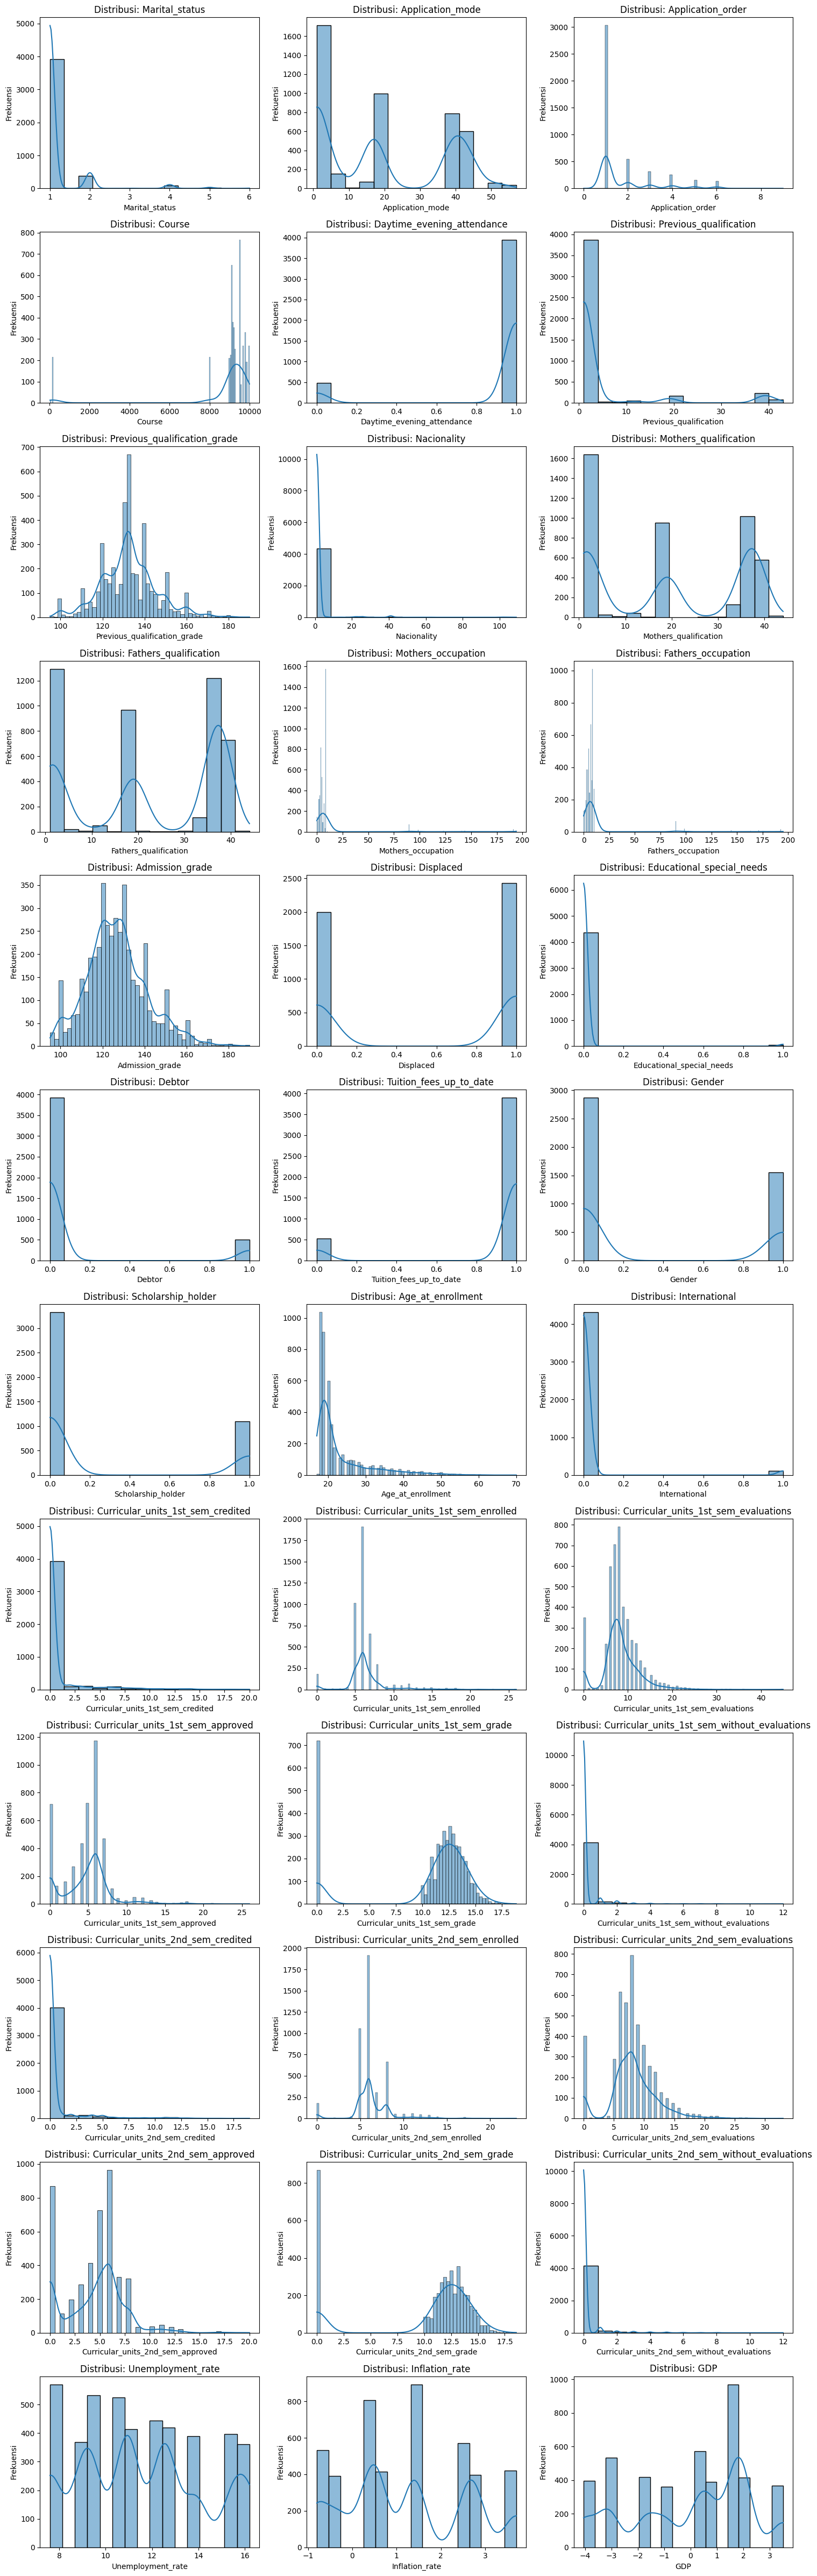


--- Visualisasi Distribusi Fitur Kategorikal ---


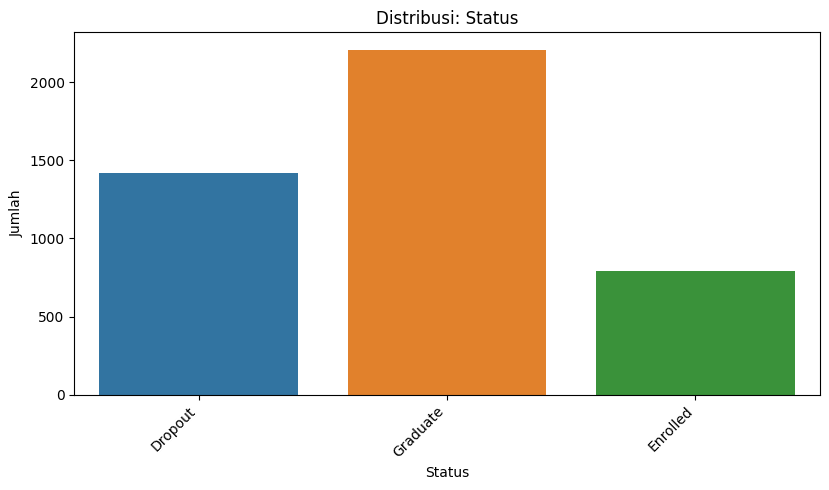

In [50]:
# Visualisasi distribusi fitur numerik
print("--- Visualisasi Distribusi Fitur Numerik ---")
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns

n_numerical = len(numerical_cols)
n_cols = 3 
n_rows = math.ceil(n_numerical / n_cols)  

# Membuat visualisasi grid untuk fitur numerik
plt.figure(figsize=(15, 4 * n_rows))
for i, col in enumerate(numerical_cols):
    plt.subplot(n_rows, n_cols, i+1)
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribusi: {col}')
    plt.xlabel(col)
    plt.ylabel('Frekuensi')
plt.tight_layout()
plt.show()

# Visualisasi distribusi fitur kategorikal 
print("\n--- Visualisasi Distribusi Fitur Kategorikal ---")
n_categorical = len(categorical_cols)
n_cols = 2  
n_rows = math.ceil(n_categorical / n_cols) 

plt.figure(figsize=(16, 5 * n_rows))
for i, col in enumerate(categorical_cols):
    plt.subplot(n_rows, n_cols, i+1)
    sns.countplot(data=df, x=col)
    plt.title(f'Distribusi: {col}')
    plt.xlabel(col)
    plt.ylabel('Jumlah')
    plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

1. **Distribusi Fitur Numerik:**

* Sebagian besar fitur numerik seperti `Age_at_enrollment`, `Admission_grade`, `Curricular_units_*`, dan `GDP` menunjukkan **distribusi miring ke kanan** (right-skewed), artinya banyak mahasiswa berada di rentang nilai yang lebih rendah, sedangkan hanya sebagian kecil yang memiliki nilai tinggi.
* Beberapa fitur seperti `Unemployment_rate` dan `Inflation_rate` terlihat memiliki distribusi yang **lebih merata atau mendekati normal**.
* Nilai pada kolom `Curricular_units` menunjukkan **lonjakan frekuensi pada nilai-nilai tertentu**, yang kemungkinan besar berkaitan dengan sistem kredit semester.
* Banyak fitur numerik bersifat **diskrit**, meskipun tipenya numerik (contoh: `Application_order`, `Course`, `Nationality`), karena representasi angka tersebut sebenarnya mewakili kategori atau kode tertentu.



2. **Distribusi Target (Status):**

* Fitur target `Status` menunjukkan distribusi:

  * **Graduate (Lulus)** mendominasi, diikuti oleh **Dropout (DO)** dan **Enrolled (masih aktif)**.
  * Ini menunjukkan bahwa dataset cukup **imbalance**.



3. **Kesimpulan:**

* Ketidakseimbangan (imbalance) yang ditemukan dapat mempengaruhi performa model prediktif.
* Banyaknya nilai nol pada fitur seperti `Tuition_fees_up_to_date`, `Debtor`, dan `Displaced` menunjukkan bahwa mayoritas mahasiswa tidak mengalami kondisi tersebut, yang dapat menjadi informasi penting dalam segmentasi atau prediksi keberhasilan studi.


Mengetahui hubungan linear antar kolom numerik, berguna untuk analisis fitur.

In [51]:
print("Korelasi Antar Kolom Numerik:")
df.corr(numeric_only=True)

Korelasi Antar Kolom Numerik:


,Marital_status,Application_mode,Application_order,Course,Daytime_evening_attendance,Previous_qualification,Previous_qualification_grade,Nacionality,Mothers_qualification,Fathers_qualification,Mothers_occupation,Fathers_occupation,Admission_grade,Displaced,Educational_special_needs,Debtor,Tuition_fees_up_to_date,Gender,Scholarship_holder,Age_at_enrollment,International,Curricular_units_1st_sem_credited,Curricular_units_1st_sem_enrolled,Curricular_units_1st_sem_evaluations,Curricular_units_1st_sem_approved,Curricular_units_1st_sem_grade,Curricular_units_1st_sem_without_evaluations,Curricular_units_2nd_sem_credited,Curricular_units_2nd_sem_enrolled,Curricular_units_2nd_sem_evaluations,Curricular_units_2nd_sem_approved,Curricular_units_2nd_sem_grade,Curricular_units_2nd_sem_without_evaluations,Unemployment_rate,Inflation_rate,GDP
Marital_status,1.000000,0.264006,-0.125854,0.046365,-0.274939,0.062529,-0.022406,-0.008843,0.193163,0.130353,0.034994,0.031609,-0.004771,-0.234886,-0.028343,0.034304,-0.087158,-0.014738,-0.053765,0.522717,-0.027905,0.061209,0.052107,0.058030,-0.031027,-0.059811,0.034711,0.062831,0.039026,0.022784,-0.043739,-0.071506,0.020426,-0.020338,0.008761,-0.027003
Application_mode,0.264006,1.000000,-0.286357,0.065385,-0.304092,0.422411,-0.039020,-0.000661,0.118974,0.083276,0.051600,0.036707,-0.013271,-0.301197,-0.030779,0.122818,-0.136262,0.160130,-0.163117,0.516243,0.003438,0.247426,0.164299,0.225938,-0.029055,-0.117741,0.045828,0.238445,0.130046,0.167872,-0.071526,-0.115424,0.047983,0.089080,-0.016375,-0.022743
Application_order,-0.125854,-0.286357,1.000000,0.059507,0.158657,-0.184315,-0.064484,-0.022416,-0.064956,-0.050288,-0.039039,-0.030014,-0.096930,0.332362,0.025597,-0.072151,0.055891,-0.089559,0.073709,-0.271154,-0.028801,-0.133354,-0.016808,-0.092156,0.035580,0.058308,-0.031699,-0.125815,0.028878,-0.055089,0.071793,0.055517,-0.015757,-0.098419,-0.011133,0.030201
Course,0.046365,0.065385,0.059507,1.000000,-0.043151,0.006654,-0.081013,-0.033923,0.054543,0.050724,0.031265,0.028881,-0.125058,-0.087399,-0.018795,-0.032673,0.018381,-0.099571,0.017138,0.042994,-0.026737,-0.096335,0.328461,0.272845,0.180500,0.389349,0.034514,-0.089817,0.401539,0.278797,0.198032,0.348728,0.030816,0.007153,0.017710,-0.020265
Daytime_evening_attendance,-0.274939,-0.304092,0.158657,-0.043151,1.000000,-0.071871,0.052597,0.018530,-0.204767,-0.139894,-0.019067,-0.015477,0.007970,0.251767,0.031017,0.006658,0.038799,-0.012326,0.093912,-0.462280,0.027973,-0.127466,-0.043056,-0.045889,0.016935,0.063974,0.045630,-0.111953,0.000371,0.014610,0.034022,0.050493,-0.004229,0.061974,-0.024043,0.022929
Previous_qualification,0.062529,0.422411,-0.184315,0.006654,-0.071871,1.000000,0.104072,-0.029214,-0.013190,-0.006614,0.014822,0.016263,0.184183,-0.115188,-0.010461,0.095104,-0.068453,0.078684,-0.070513,0.156234,-0.026226,0.166025,0.078702,0.130597,0.022020,-0.000497,0.002887,0.143031,0.056179,0.114850,-0.008632,0.000942,0.005102,0.111958,-0.063736,0.064069
Previous_qualification_grade,-0.022406,-0.039020,-0.064484,-0.081013,0.052597,0.104072,1.000000,0.054088,-0.060670,-0.035234,-0.011415,-0.019284,0.580444,-0.011001,-0.001458,-0.037507,0.060578,-0.047874,0.055965,-0.111377,0.048529,-0.008872,-0.029169,-0.070702,0.048410,0.059438,-0.003926,-0.018489,-0.031649,-0.061355,0.050263,0.053239,-0.019015,0.045222,0.018710,-0.052620
Nacionality,-0.008843,-0.000661,-0.022416,-0.033923,0.018530,-0.029214,0.054088,1.000000,-0.049946,-0.085282,0.043187,0.020626,0.028176,-0.007448,-0.005982,0.051989,-0.026115,-0.023258,-0.010490,-0.003647,0.790935,-0.000370,-0.013292,-0.007763,-0.002268,0.000869,0.009145,-0.007278,-0.020113,-0.025721,-0.017880,-0.008497,-0.014041,-0.000651,-0.008922,0.034478
Mothers_qualification,0.193163,0.118974,-0.064956,0.054543,-0.204767,-0.013190,-0.060670,-0.049946,1.000000,0.535140,0.076772,0.052329,-0.054412,-0.081176,-0.021534,0.018774,-0.025665,-0.058753,0.045951,0.294614,-0.038504,0.046855,0.053664,0.045440,-0.011026,-0.036157,0.003183,

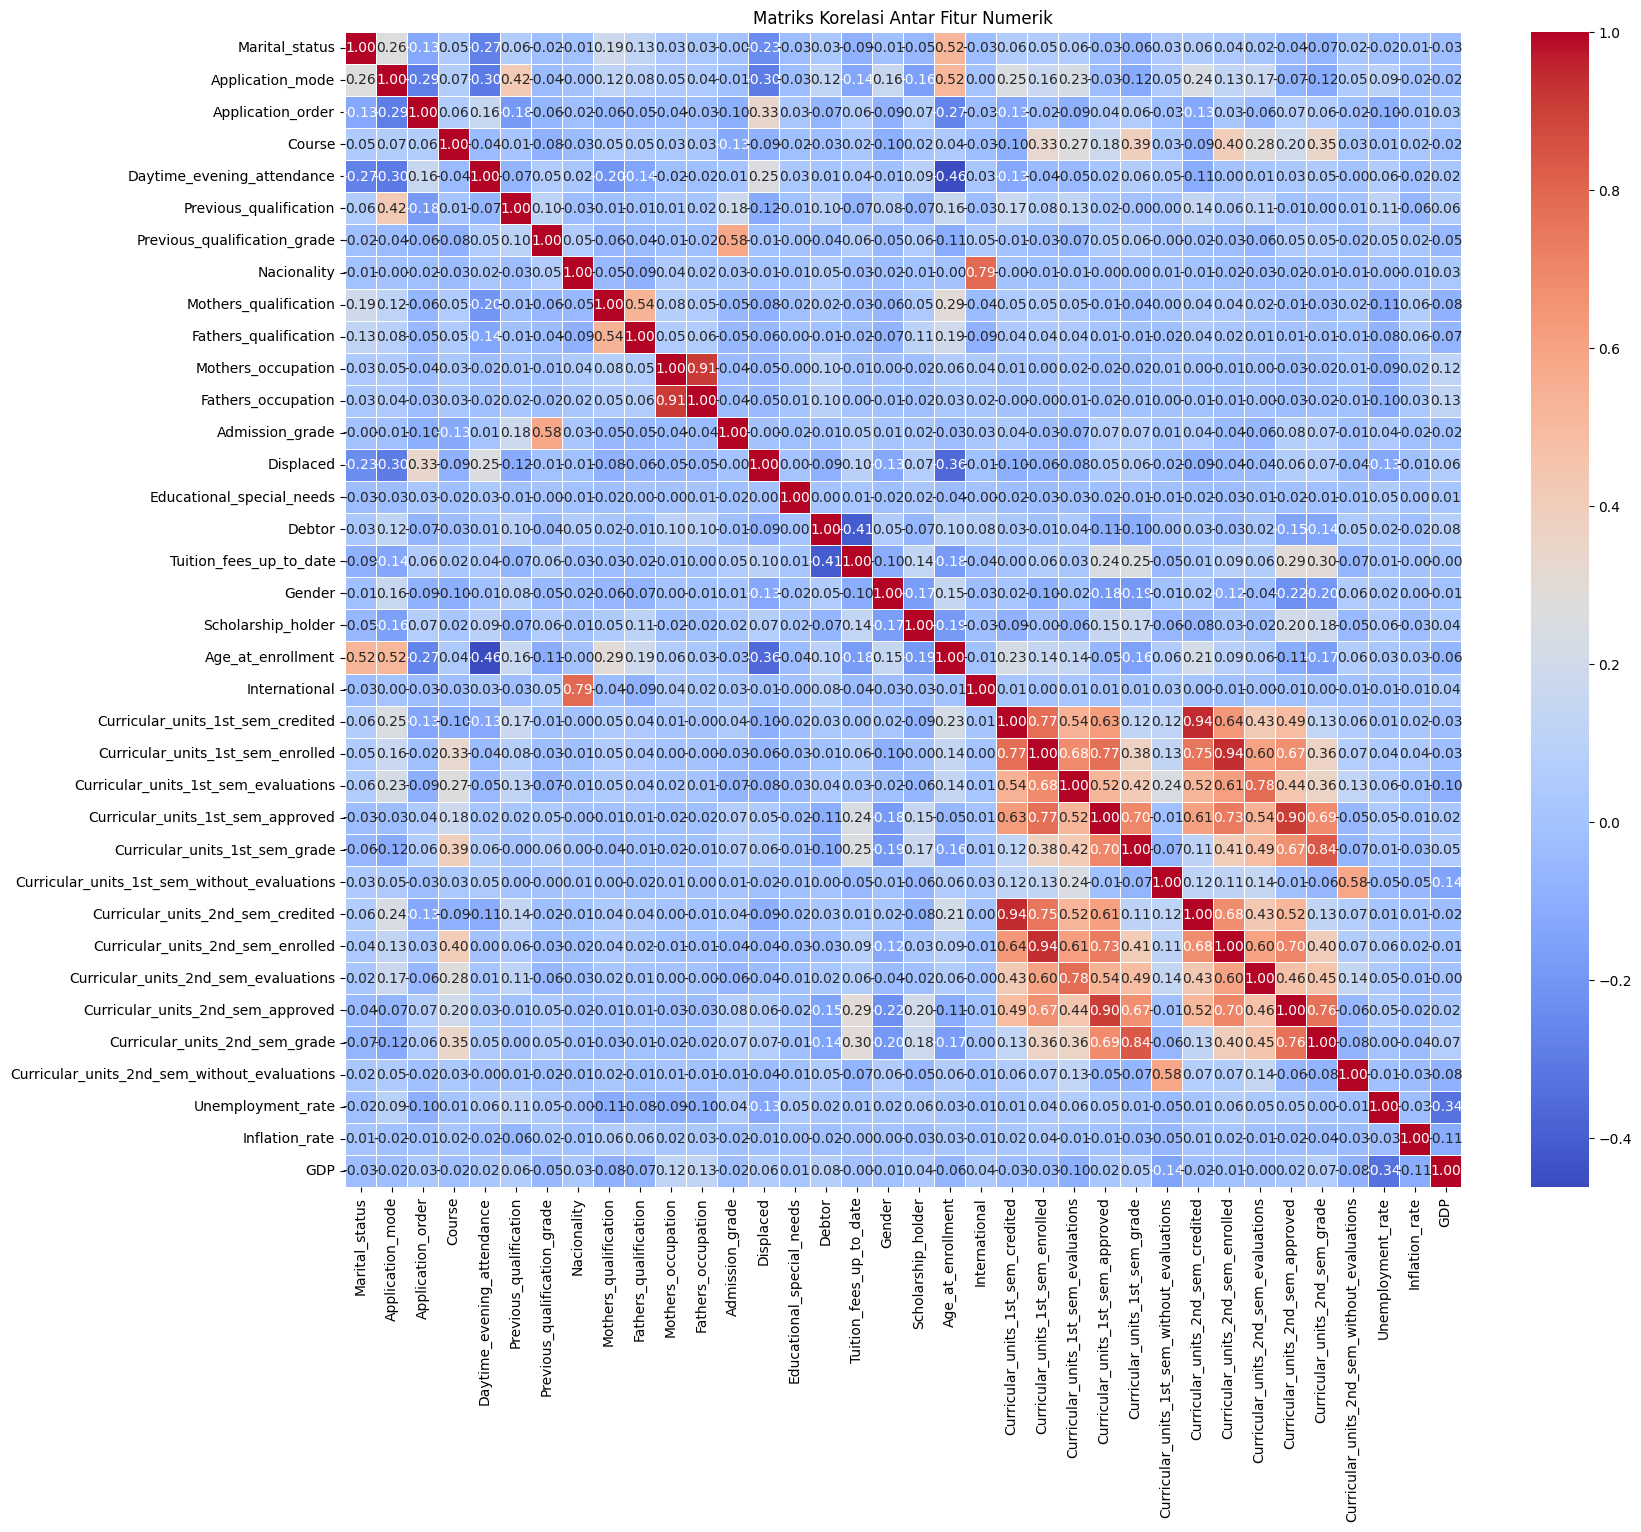

In [52]:
# Identifikasi fitur numerik
numerical_features = df.select_dtypes(include=['int64', 'float64']).columns

# Menghitung matriks korelasi
correlation_matrix = df[numerical_features].corr()

# Membuat heatmap
plt.figure(figsize=(18, 15))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Matriks Korelasi Antar Fitur Numerik')
plt.show()

**Key Insights**

1. **Korelasi Positif yang Kuat:**

   * **Korelasi Unit Kurikuler:** Terdapat korelasi positif yang sangat kuat di antara berbagai ukuran unit kurikuler (misalnya, `Curricular_units_1st_sem_enrolled`, `Curricular_units_1st_sem_approved`, `Curricular_units_2nd_sem_enrolled`, `Curricular_units_2nd_sem_approved`, `Curricular_units_1st_sem_grade`, `Curricular_units_2nd_sem_grade`). Hal ini menunjukkan bahwa kinerja dan progres mahasiswa antar semester sangat berkaitan erat. Mahasiswa yang mengambil banyak mata kuliah cenderung lulus banyak mata kuliah juga, dan nilai mereka juga saling berkaitan.

   * **Pekerjaan Ayah dan Ibu:** Terdapat korelasi positif yang kuat antara `Fathers_occupation` dan `Mothers_occupation` (sekitar 0.91). Ini cukup intuitif, karena mungkin terdapat faktor sosial ekonomi yang memengaruhi pekerjaan kedua orang tua.

   * **Biaya Kuliah dan Status Debitur:** Terdapat korelasi positif sedang (sekitar 0.41) antara `Tuition_fees_up_to_date` dan `Debtor`. Hal ini mungkin menunjukkan bahwa mahasiswa yang membayar biaya kuliah tepat waktu cenderung lebih kecil kemungkinannya menjadi debitur, yang masuk akal.

   * **Nilai Masuk dan Nilai Kualifikasi Sebelumnya:** Terdapat korelasi positif sedang (sekitar 0.58) antara `Admission_grade` dan `Previous_qualification_grade`. Ini menunjukkan bahwa kinerja akademik sebelumnya merupakan prediktor yang baik untuk nilai masuk mahasiswa.

2. **Korelasi Negatif yang Kuat:**

   * **Usia Saat Pendaftaran dan Status Pernikahan:** Terdapat korelasi negatif yang kuat (sekitar -0.62) antara `Age_at_enrollment` dan `Marital_status`. Ini menunjukkan bahwa mahasiswa yang lebih tua cenderung tidak lajang (atau sebaliknya, mahasiswa yang lebih muda cenderung lajang), tergantung pada bagaimana `Marital_status` dikodekan.

   * **Usia Saat Pendaftaran dan Penerima Beasiswa:** Terdapat korelasi negatif sedang (sekitar -0.52) antara `Age_at_enrollment` dan `Scholarship_holder`. Ini mungkin mengindikasikan bahwa mahasiswa yang lebih muda lebih cenderung menjadi penerima beasiswa, kemungkinan karena beasiswa lebih banyak ditujukan untuk mahasiswa berusia tradisional.

   * **Waktu Kehadiran (Siang/Malam) dan Mode Pendaftaran:** Terdapat korelasi negatif sedang (sekitar -0.28) antara `Daytime_evening_attendance` dan `Application_mode`. Ini bisa mengindikasikan bahwa mode pendaftaran yang berbeda berkaitan dengan pilihan waktu kehadiran mahasiswa yang berbeda (misalnya, mahasiswa malam mungkin mendaftar melalui mode tertentu).

3. **Korelasi Lemah (Mendekati 0):**

   * Banyak variabel demografis (misalnya, `Nationality`, `Gender`, `Displaced`, `Educational_special_needs`) menunjukkan korelasi yang sangat lemah dengan sebagian besar variabel lainnya. Ini berarti bahwa faktor-faktor ini tidak terlalu memengaruhi atau dipengaruhi oleh variabel lain dalam dataset.

   * Indikator ekonomi seperti `Unemployment_rate`, `Inflation_rate`, dan `GDP` umumnya menunjukkan korelasi yang lemah dengan variabel-variabel spesifik mahasiswa. Hal ini menunjukkan bahwa faktor-faktor makroekonomi tersebut mungkin tidak secara langsung dan signifikan memengaruhi kinerja atau karakteristik mahasiswa secara individu (setidaknya tidak secara linear).


#### Perbandingan Feature

In [53]:
# Visualisasi distribusi fitur kategorikal
def categorical_plot(features, df, segment=None):
    fig, axs = plt.subplots(len(features), 1, figsize=(16, 5 * len(features)))
    axs = axs if len(features) > 1 else [axs]
    for i, feat in enumerate(features):
        sns.countplot(data=df, x=segment if segment else feat, hue=feat if segment else None, ax=axs[i])
        axs[i].set_title(f"Distribusi {feat} berdasarkan {segment}" if segment else f"Distribusi {feat}")
        for bar in axs[i].patches:
            h = bar.get_height()
            if h:
                axs[i].annotate(f'{int(h)}', (bar.get_x() + bar.get_width()/2, h), ha='center', va='bottom')
        axs[i].set_ylabel(None)
        axs[i].grid(True, linestyle='--', alpha=0.5)
    plt.tight_layout()
    plt.show()

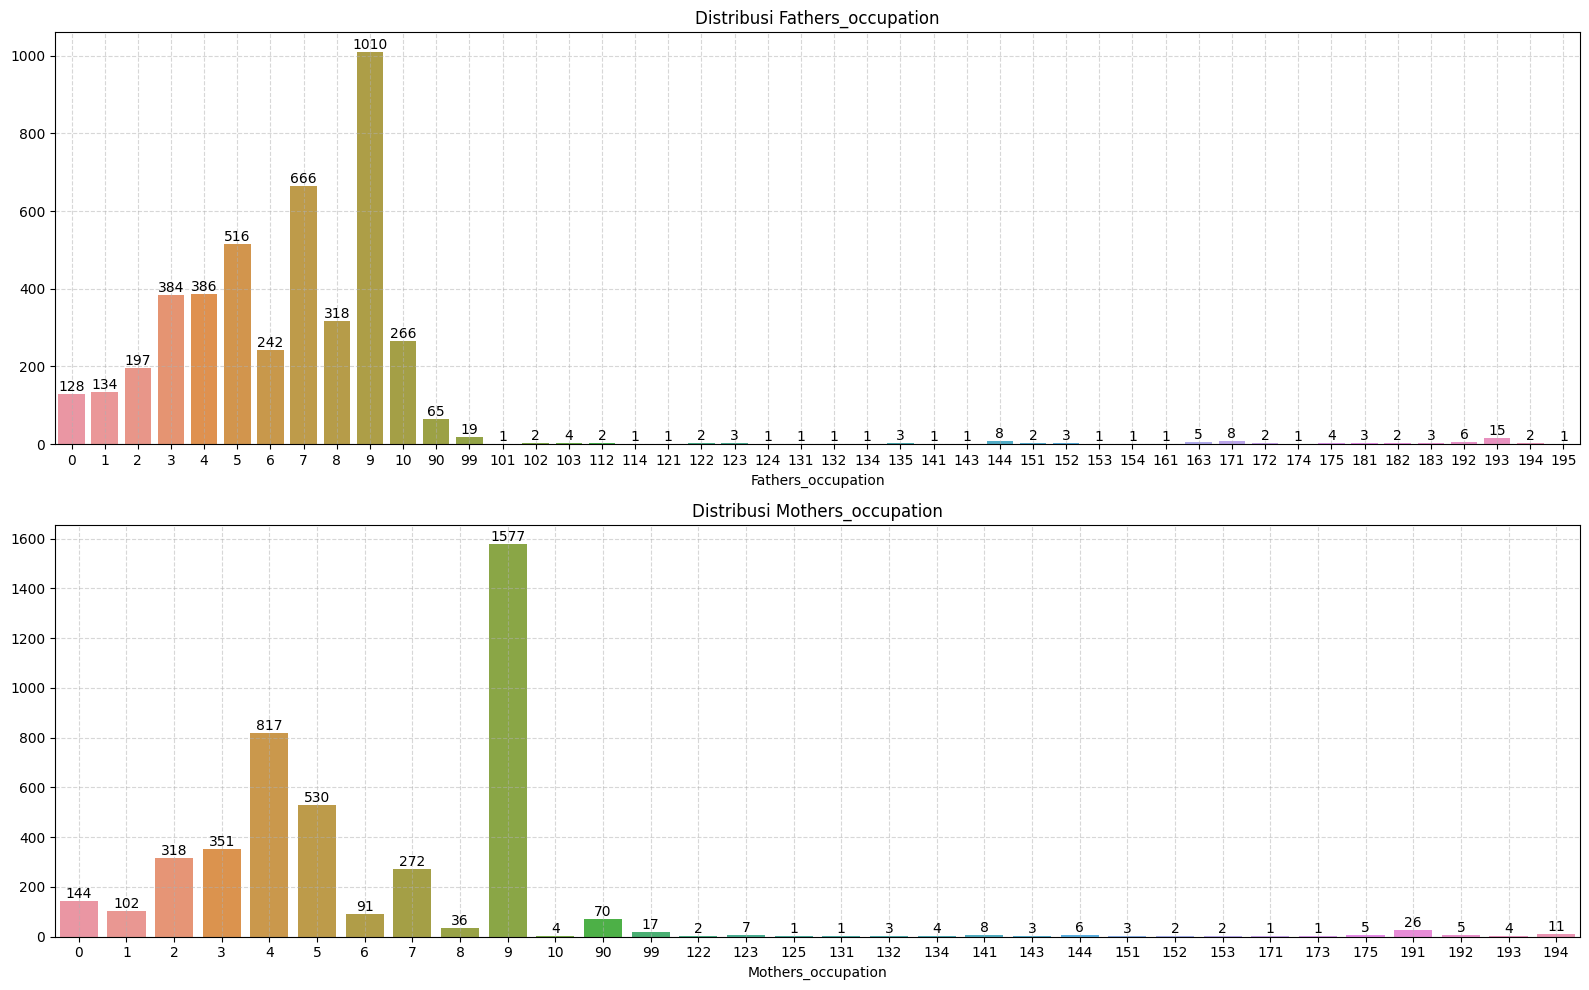

In [54]:
# 1. Pekerjaan Ayah vs Pekerjaan Ibu (visualisasi berpisah saja)
categorical_plot(['Fathers_occupation', 'Mothers_occupation'], df)

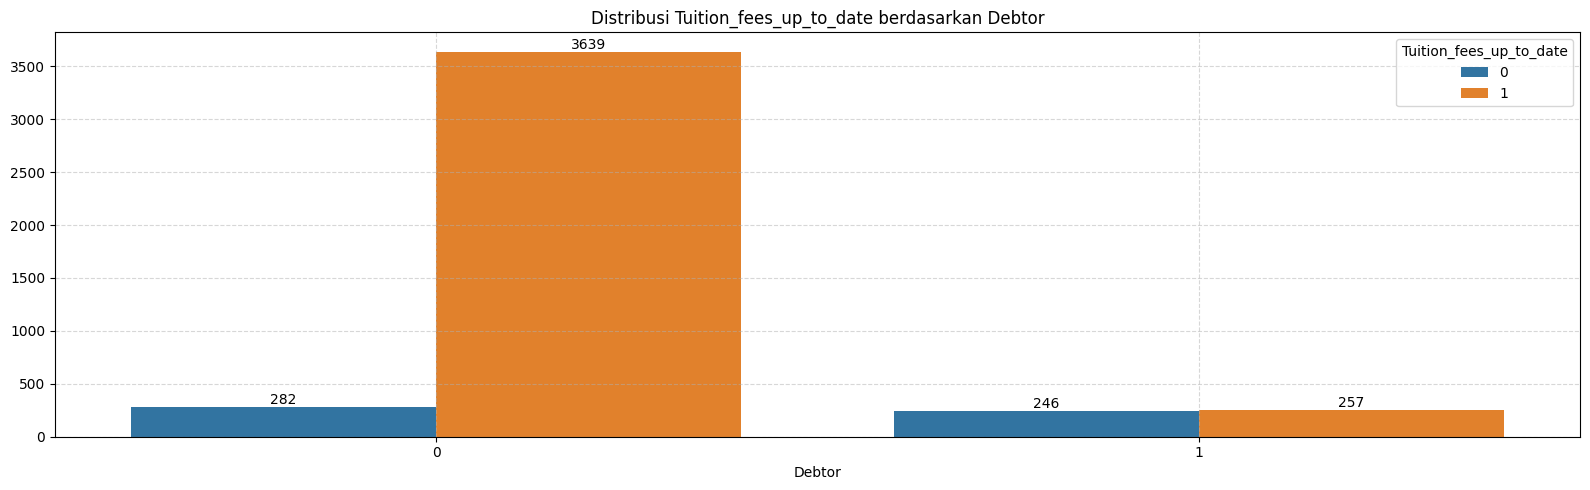

In [55]:
# 2. Status Debitur vs Pembayaran Biaya Kuliah
categorical_plot(['Tuition_fees_up_to_date'], df, segment='Debtor')

In [56]:
bins = [15, 20, 25, 30, 40, 50]
labels = ['16-20', '21-25', '26-30', '31-40', '41-50']
df['Age_group'] = pd.cut(df['Age_at_enrollment'], bins=bins, labels=labels, right=False)

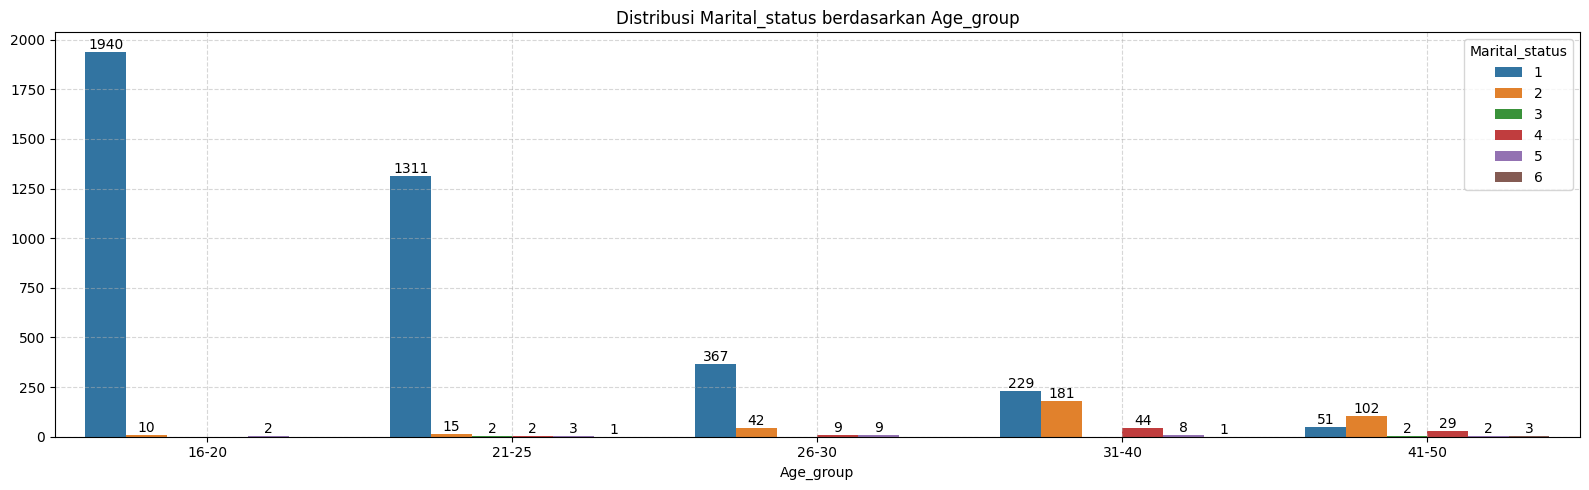

In [57]:
# Marital Status per kelompok usia
categorical_plot(['Marital_status'], df, segment='Age_group')

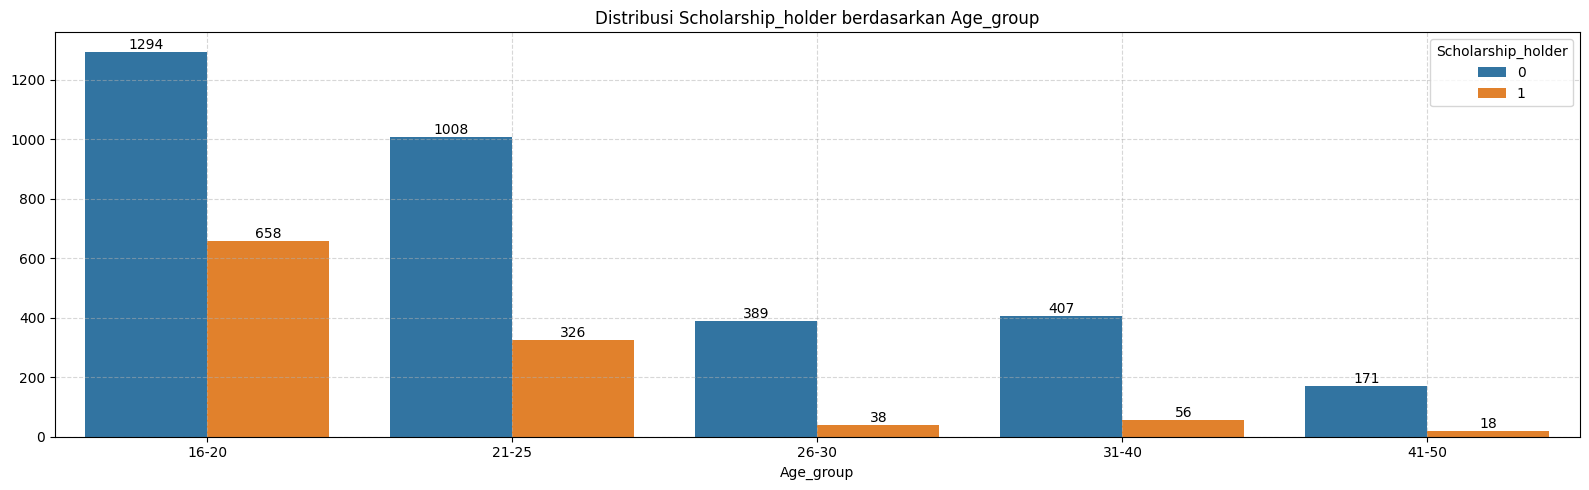

In [58]:
# Scholarship Holder per kelompok usia
categorical_plot(['Scholarship_holder'], df, segment='Age_group')

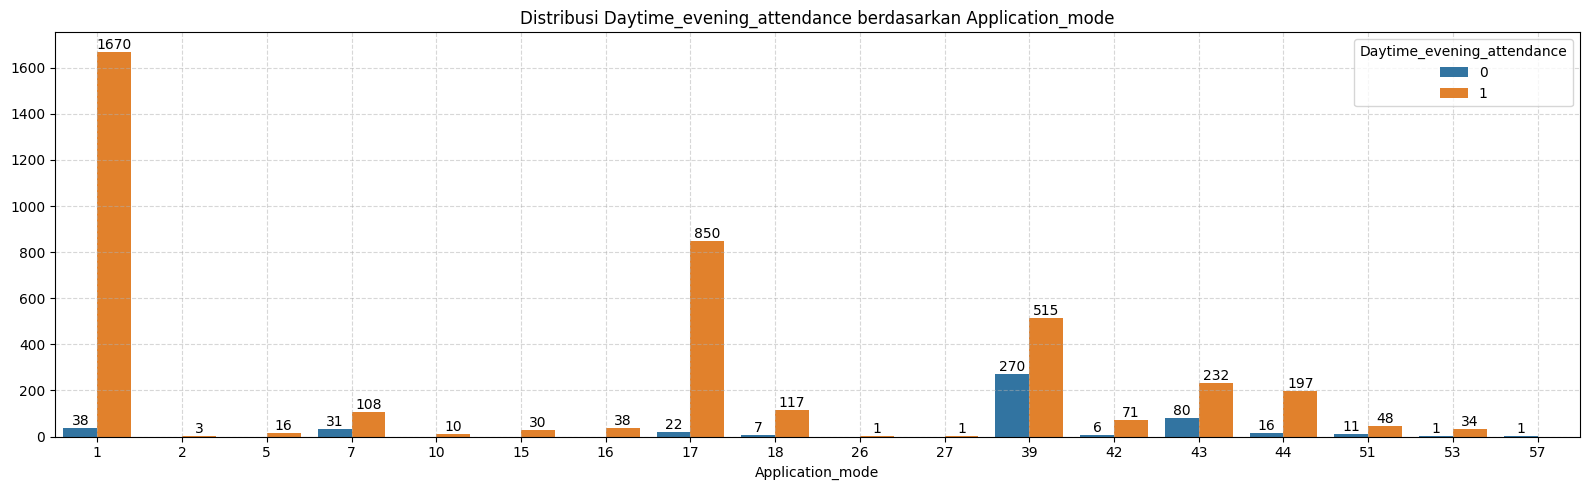

In [59]:
# 5. Daytime/Evening Attendance vs Application Mode
categorical_plot(['Daytime_evening_attendance'], df, segment='Application_mode')

Melihat distribusi status mahasiswa

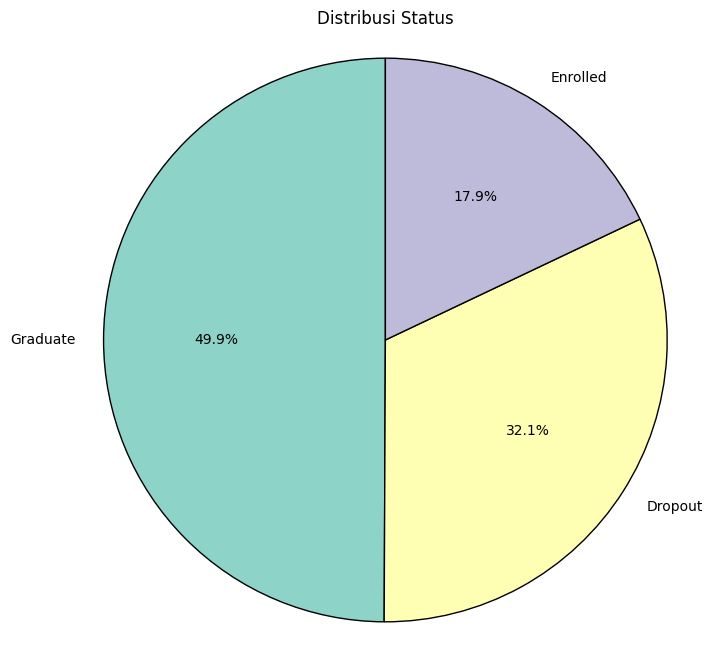

In [63]:
# Hitung frekuensi setiap status dan buat DataFrame baru
status_freq = df['Status'].value_counts().reset_index()
status_freq.columns = ['Status', 'Jumlah']

# Setup warna palet dari seaborn
palette = sns.color_palette("Set3", n_colors=len(status_freq))

# Buat pie chart dengan matplotlib
plt.figure(figsize=(8, 8))
plt.pie(status_freq['Jumlah'], labels=status_freq['Status'], autopct='%1.1f%%', colors=palette, startangle=90, wedgeprops={'edgecolor': 'black'})
plt.title('Distribusi Status')
plt.axis('equal') 
plt.show()

In [81]:
df_encoded = df.copy()

le = LabelEncoder()
df_encoded['Status_encoded'] = le.fit_transform(df_encoded['Status'])

numerical_features = df_encoded.select_dtypes(include=['number']).columns.tolist()
df_encoded[numerical_features].corr()['Status_encoded'].sort_values(ascending=False)

Status_encoded                                  1.000000
Curricular_units_2nd_sem_approved               0.624157
Curricular_units_2nd_sem_grade                  0.566827
Curricular_units_1st_sem_approved               0.529123
Curricular_units_1st_sem_grade                  0.485207
Tuition_fees_up_to_date                         0.409827
Scholarship_holder                              0.297595
Curricular_units_2nd_sem_enrolled               0.175847
Curricular_units_1st_sem_enrolled               0.155974
Admission_grade                                 0.120889
Displaced                                       0.113986
Previous_qualification_grade                    0.103764
Curricular_units_2nd_sem_evaluations            0.092721
Application_order                               0.089791
Daytime_evening_attendance                      0.075107
Curricular_units_2nd_sem_credited               0.054004
Curricular_units_1st_sem_credited               0.048150
Curricular_units_1st_sem_evalua

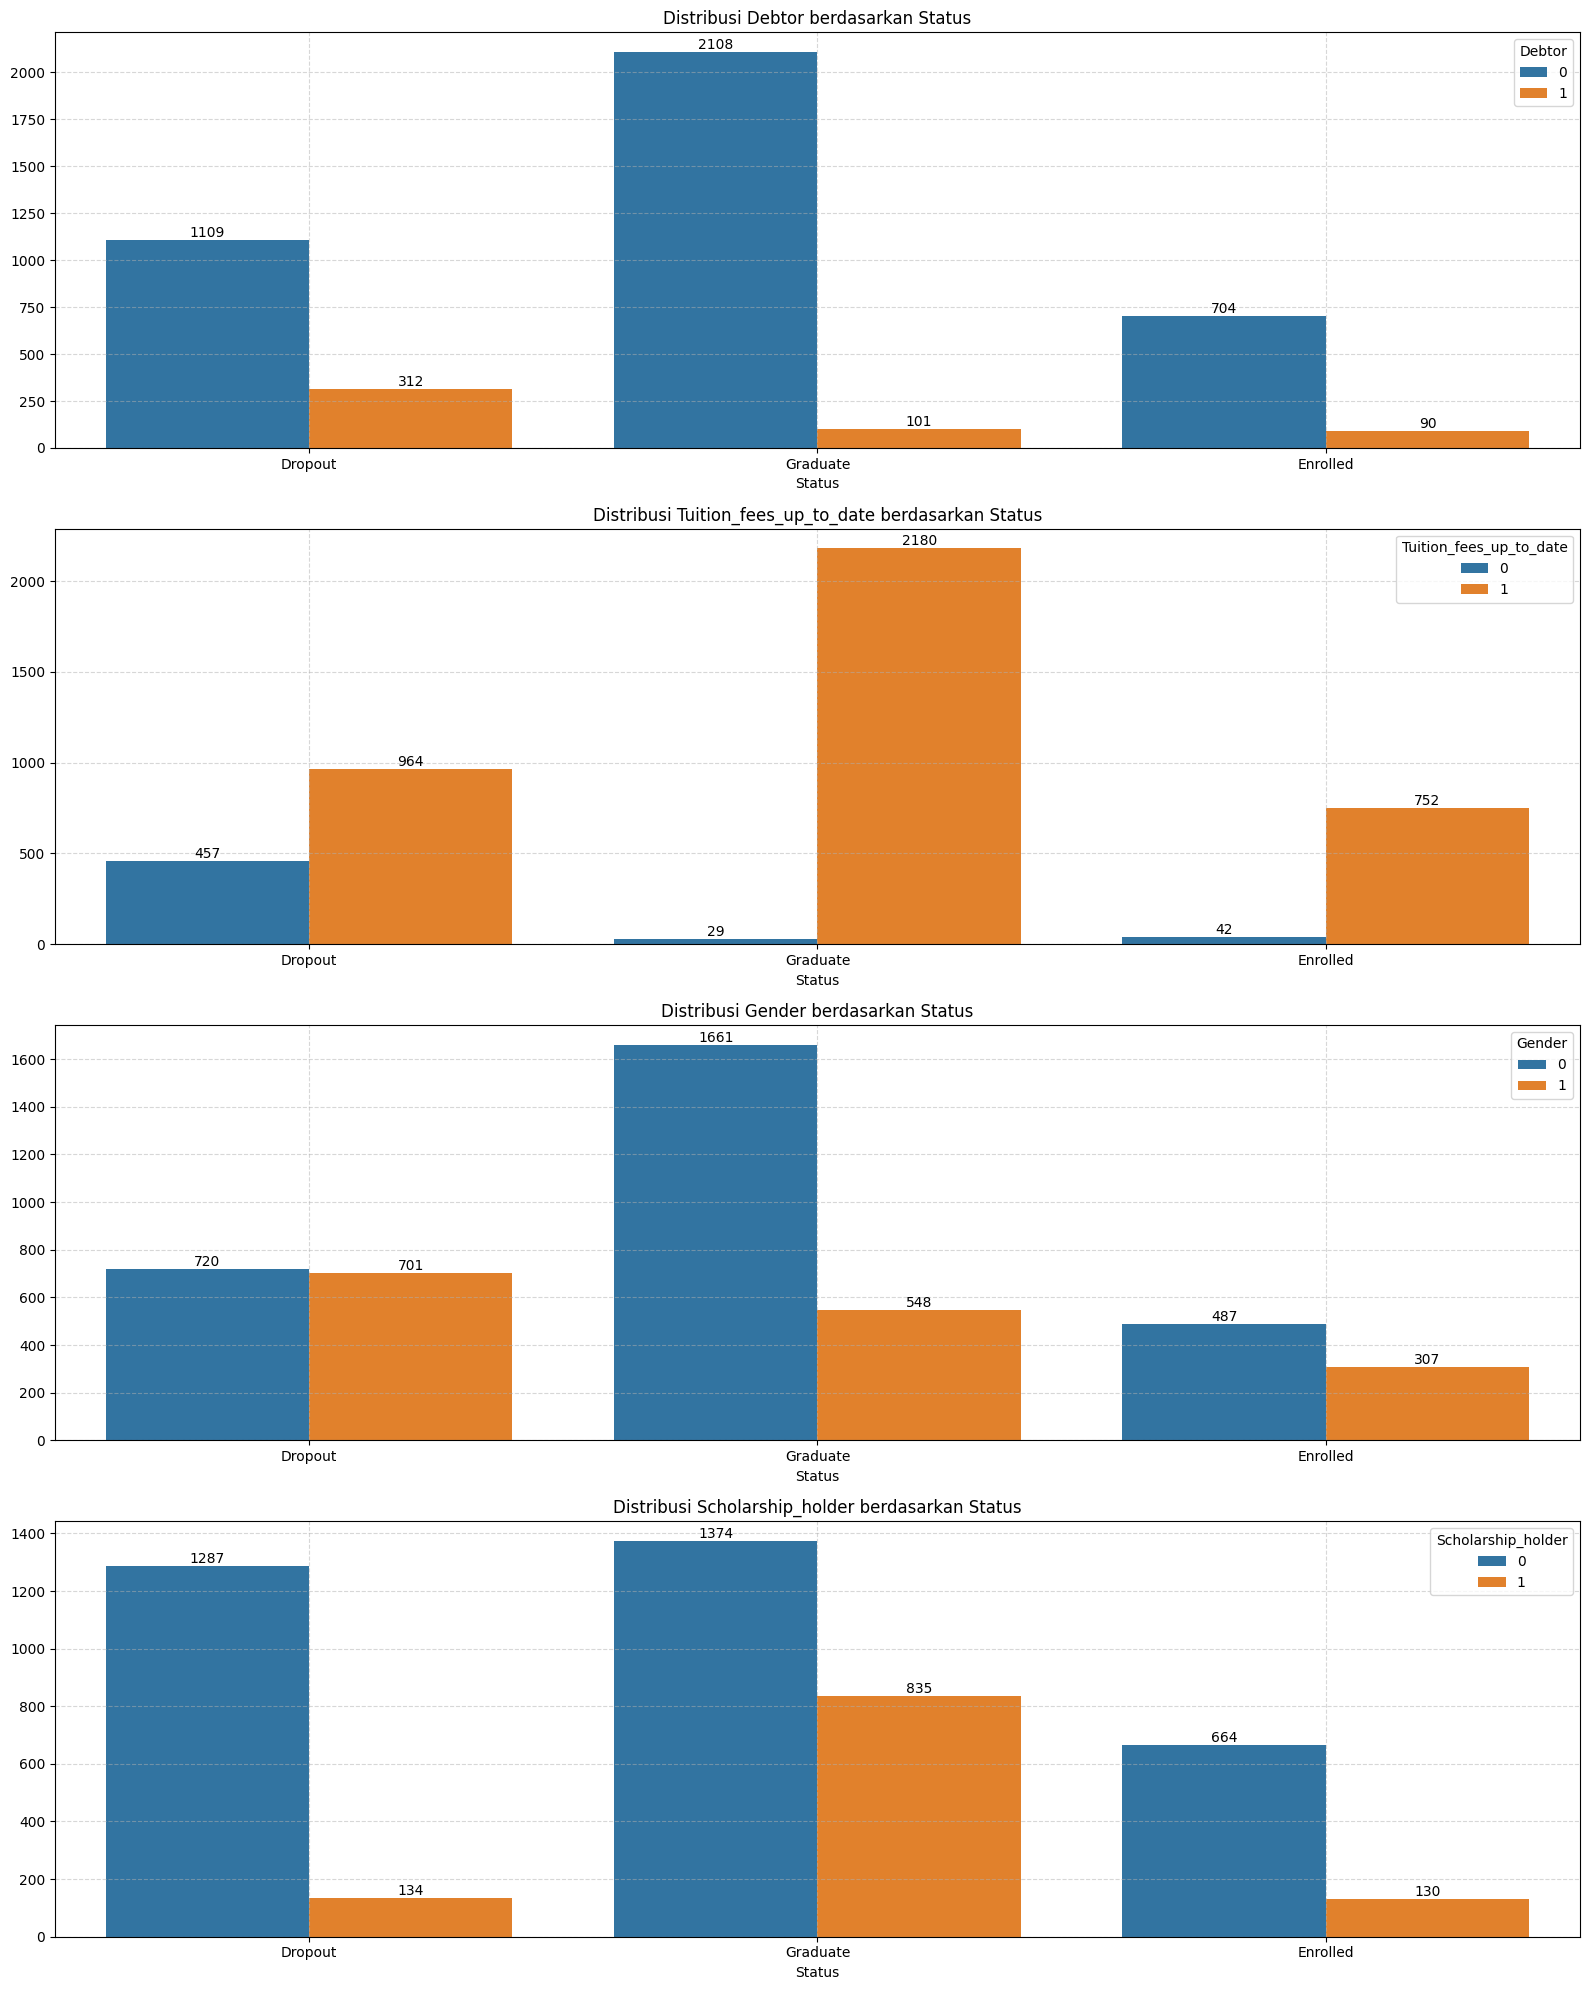

In [83]:
categorical_plot(['Debtor','Tuition_fees_up_to_date','Gender','Scholarship_holder'], df, segment='Status')

## Data Preparation / Preprocessing

In [88]:
df.drop(columns=['Age_group'], inplace=True)

In [89]:
df.fillna(0.0, inplace=True)

#### Feature Selection

In [90]:
df_pre = df.copy()

In [91]:
columns = [
    'Application_mode', 'Debtor', 'Tuition_fees_up_to_date', 'Gender', 'Scholarship_holder', 
    'Age_at_enrollment', 'Curricular_units_1st_sem_approved', 'Curricular_units_1st_sem_grade', 
    'Curricular_units_2nd_sem_approved', 'Curricular_units_2nd_sem_grade', 'Status'
]

# Ambil subset dataframe berdasarkan kolom terpilih
filtered_df = df_pre.loc[:, columns]

# Hapus baris dengan status 'Enrolled' agar fokus pada status lain
filtered_df = filtered_df[filtered_df['Status'] != 'Enrolled']

In [92]:
filtered_df.sample(5)

,Application_mode,Debtor,Tuition_fees_up_to_date,Gender,Scholarship_holder,Age_at_enrollment,Curricular_units_1st_sem_approved,Curricular_units_1st_sem_grade,Curricular_units_2nd_sem_approved,Curricular_units_2nd_sem_grade,Status
675,17,0,1,0,0,23,2,10.000000,2,11.000000,Dropout
827,1,0,1,0,1,18,6,15.833333,6,15.333333,Graduate
1934,1,0,1,0,1,19,6,12.808333,7,12.825714,Graduate
1147,51,0,1,0,0,21,4,11.500000,5,11.400000,Graduate
3242,39,0,1,0,0,38,3,10.250000,1,12.000000,Dropout


<Axes: xlabel='Status', ylabel='count'>

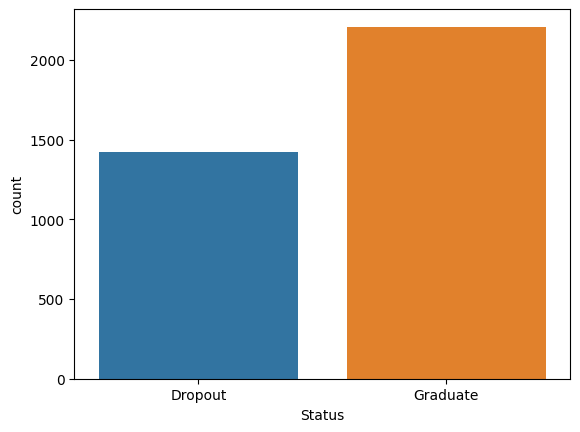

In [93]:
sns.countplot(x='Status',data=filtered_df)

In [94]:
X = filtered_df.drop(columns=['Status'])
y = filtered_df['Status']

In [97]:
smote_combo = SMOTE(random_state=42, sampling_strategy=0.7) 
X_res_combo, y_res_combo = smote_combo.fit_resample(X, y)

rus_combo = RandomUnderSampler(random_state=42, sampling_strategy=1) 
X_res_combo_balanced, y_res_combo_balanced = rus_combo.fit_resample(X_res_combo, y_res_combo)

print("Combined Oversampling and Undersampling:")
print(y_res_combo_balanced.value_counts())

Combined Oversampling and Undersampling:
Status
Dropout     1546
Graduate    1546
Name: count, dtype: int64


In [99]:
X_train, X_test, y_train, y_test = train_test_split(X_res_combo_balanced, y_res_combo_balanced, test_size=0.2, random_state=42)
print(X_train.shape)
print(X_test.shape)

(2473, 10)
(619, 10)


In [102]:
encoder = LabelEncoder()
encoder.fit(y_train)
y_train_encode = encoder.transform(y_train)

y_test_encode = encoder.transform(y_test)

print('y_train_encode  :', y_train_encode.shape)
print('y_test_encode  :', y_test_encode.shape)

y_train_encode  : (2473,)
y_test_encode  : (619,)


## Modeling

In [103]:
# Dictionary untuk menyimpan model dan metrik evaluasi
model_collection = {
    'LR': LogisticRegression(class_weight='balanced', max_iter=10000),
    'SVM': SVC(class_weight='balanced', max_iter=10000),
    'DT': DecisionTreeClassifier(class_weight='balanced'),
    'GB': GradientBoostingClassifier(),
    'RF': RandomForestClassifier(class_weight='balanced'),
    'KNN': KNeighborsClassifier(),
    'NB': GaussianNB()
}

# Dictionary untuk menyimpan hasil evaluasi
evaluation_scores = {
    'accuracy': defaultdict(float),
    'precision': defaultdict(float),
    'recall': defaultdict(float),
    'f1_score': defaultdict(float)
}

In [105]:
# Pelatihan dan evaluasi setiap model
for name, model in model_collection.items():
    model.fit(X_train, y_train_encode)
    y_pred = model.predict(X_test)

    evaluation_scores['accuracy'][name] = accuracy_score(y_test_encode, y_pred)
    evaluation_scores['precision'][name] = precision_score(y_test_encode, y_pred)
    evaluation_scores['recall'][name] = recall_score(y_test_encode, y_pred)
    evaluation_scores['f1_score'][name] = f1_score(y_test_encode, y_pred)
    print(f'Model: {name}')
    print(classification_report(y_test_encode, y_pred))

Model: LR
              precision    recall  f1-score   support

           0       0.91      0.83      0.87       326
           1       0.83      0.91      0.87       293

    accuracy                           0.87       619
   macro avg       0.87      0.87      0.87       619
weighted avg       0.87      0.87      0.87       619

Model: SVM
              precision    recall  f1-score   support

           0       0.94      0.80      0.87       326
           1       0.81      0.95      0.87       293

    accuracy                           0.87       619
   macro avg       0.88      0.87      0.87       619
weighted avg       0.88      0.87      0.87       619

Model: DT
              precision    recall  f1-score   support

           0       0.86      0.86      0.86       326
           1       0.84      0.84      0.84       293

    accuracy                           0.85       619
   macro avg       0.85      0.85      0.85       619
weighted avg       0.85      0.85      0.85

In [107]:
# Menggabungkan metrik evaluasi model ke dalam DataFrame
metrics_data = {
    'Accuracy': list(evaluation_scores['accuracy'].values()),
    'Precision': list(evaluation_scores['precision'].values()),
    'Recall': list(evaluation_scores['recall'].values()),
    'F1-Score': list(evaluation_scores['f1_score'].values())
}

# Menyusun DataFrame hasil evaluasi
model_performance_df = pd.DataFrame(data=metrics_data, index=evaluation_scores['accuracy'].keys())

model_performance_df

,Accuracy,Precision,Recall,F1-Score
LR,0.869144,0.829193,0.911263,0.868293
SVM,0.869144,0.809942,0.945392,0.872441
DT,0.851373,0.843003,0.843003,0.843003
GB,0.891761,0.844512,0.945392,0.892110
RF,0.894992,0.854037,0.938567,0.894309
KNN,0.870759,0.819820,0.931741,0.872204
NB,0.825525,0.754821,0.935154,0.835366


Berdasarkan metrik evaluasi, Random Forest (RF) menunjukkan kinerja terbaik secara keseluruhan dengan nilai akurasi tertinggi (0.894992) dan F1-Score tertinggi kedua (0.894309), yang mengindikasikan keseimbangan bagus antara precision dan recall. Gradient Boosting (GB) juga tampil sangat baik, tetapi nilai akurasi (0.891761) dan F1-Score (0.892110) sedikit di bawah RF.

#### Build Model

In [110]:
model = RandomForestClassifier(class_weight='balanced').fit(X_train, y_train_encode)
model

RandomForestClassifier(class_weight='balanced')

In [112]:
y_train_model = model.predict(X_train)
y_test_model = model.predict(X_test)

print(y_train_model)
print(y_test_model)

[0 1 1 ... 0 0 0]
[1 0 1 1 1 1 1 0 1 0 1 0 0 1 1 1 1 0 1 1 1 1 0 1 1 0 1 1 0 0 0 1 0 0 0 1 1
 0 0 1 0 0 0 1 0 1 0 0 1 0 0 0 0 1 1 0 0 0 1 1 1 0 0 0 1 0 0 0 1 1 0 1 1 1
 0 0 1 1 1 0 1 1 1 0 1 1 1 1 0 1 1 0 1 0 0 0 1 1 0 0 0 1 0 1 0 1 1 1 1 1 1
 0 1 0 1 1 1 0 0 1 1 0 0 0 0 1 0 1 1 1 0 1 0 1 0 0 1 1 0 0 1 1 1 0 0 0 0 0
 0 0 1 0 1 0 0 1 1 0 1 0 1 0 0 1 1 1 0 0 1 1 0 1 0 1 0 0 0 0 1 0 1 0 1 0 0
 0 0 1 1 0 0 1 0 1 0 0 0 0 0 1 0 0 0 1 0 0 1 0 1 1 1 1 0 0 0 1 0 0 1 1 1 1
 0 0 1 0 1 0 1 1 1 0 1 0 1 0 1 1 0 0 1 0 0 1 1 0 1 1 0 1 0 1 1 1 0 0 1 0 0
 0 1 0 0 1 1 1 0 0 1 0 1 0 0 1 1 1 1 1 1 1 0 0 0 0 1 1 0 1 0 1 0 1 0 1 1 0
 1 1 1 1 1 1 1 0 1 1 1 1 0 0 1 0 1 0 1 0 1 1 0 0 0 0 0 0 1 0 0 1 1 1 0 0 0
 1 0 1 1 0 0 0 1 1 1 1 0 1 0 0 0 0 0 1 0 0 0 0 1 1 1 0 0 1 1 0 1 0 1 0 1 0
 1 1 1 1 0 0 0 0 0 0 1 1 1 0 1 0 1 0 1 1 1 1 0 1 0 0 1 1 1 1 0 0 1 1 1 0 0
 1 1 0 0 1 1 1 0 1 0 1 0 0 1 1 0 0 1 0 1 1 0 1 0 1 1 1 0 0 0 0 1 0 1 1 1 0
 0 0 1 0 1 0 1 1 0 0 1 0 0 0 1 0 0 0 0 1 1 0 0 1 1 0 0 1 0 1 1 1 0 0 0 1 0
 0 1 0 

## Evaluation

In [113]:
def generate_evaluation_report(true_labels, predicted_labels, report_title='Data'):
    # Menampilkan classification report
    print(f'Classification Report for {report_title}')
    print(classification_report(true_labels, predicted_labels))
    
    # Menggambar confusion matrix
    cm = confusion_matrix(true_labels, predicted_labels)
    
    plt.figure(figsize=(5, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix for {report_title}')
    plt.ylabel('True Class', fontsize=10)
    plt.xlabel('Predicted Class', fontsize=10)
    plt.yticks(fontsize=8)
    plt.xticks(fontsize=8)
    plt.show()

Classification Report for Train Data
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1220
           1       1.00      0.98      0.99      1253

    accuracy                           0.99      2473
   macro avg       0.99      0.99      0.99      2473
weighted avg       0.99      0.99      0.99      2473



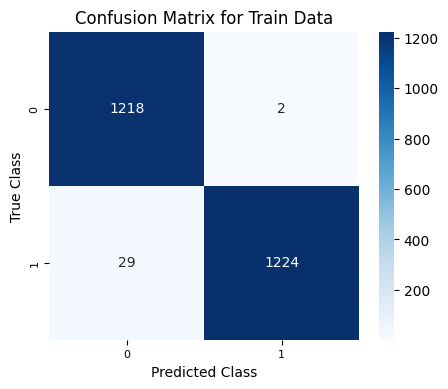

In [114]:
generate_evaluation_report(y_train_encode, y_train_model, report_title='Train Data')

Classification Report for Test Data
              precision    recall  f1-score   support

           0       0.93      0.85      0.89       326
           1       0.85      0.93      0.89       293

    accuracy                           0.89       619
   macro avg       0.89      0.89      0.89       619
weighted avg       0.89      0.89      0.89       619



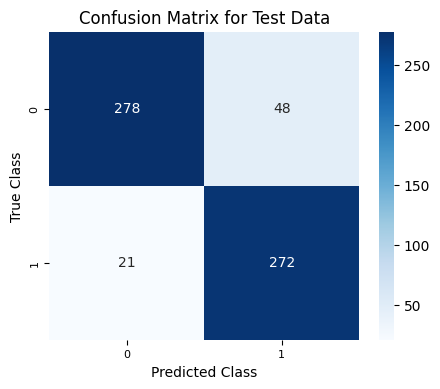

In [115]:
generate_evaluation_report(y_test_encode, y_test_model, report_title='Test Data')

#### Hyperparameter Tuning

In [118]:
# parameter grid untuk model LogisticRegression
param_search_space = {
    'n_estimators': [100, 200, 500],              # jumlah pohon di hutan :contentReference[oaicite:0]{index=0}
    'max_depth': [None, 10, 20, 30],              # kedalaman maksimum pohon :contentReference[oaicite:1]{index=1}
    'min_samples_split': [2, 5, 10],              # minimal sampel untuk membagi node :contentReference[oaicite:2]{index=2}
    'min_samples_leaf': [1, 2, 4],                # minimal sampel di daun pohon :contentReference[oaicite:3]{index=3}
    'max_features': ['auto', 'sqrt', 'log2'],     # jumlah fitur dipilih per split :contentReference[oaicite:4]{index=4}
    'bootstrap': [True, False],                   # apakah menggunakan bootstrap sampling :contentReference[oaicite:5]{index=5}
    'class_weight': [None, 'balanced']            # penanganan kelas tidak seimbang :contentReference[oaicite:6]{index=6}
}

# Inisialisasi GridSearchCV dengan model dan parameter grid
grid_search = GridSearchCV(estimator=model, param_grid=param_search_space, cv=3, n_jobs=-1, verbose=3)

grid_search

GridSearchCV(cv=3, estimator=RandomForestClassifier(class_weight='balanced'),
             n_jobs=-1,
             param_grid={'bootstrap': [True, False],
                         'class_weight': [None, 'balanced'],
                         'max_depth': [None, 10, 20, 30],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 500]},
             verbose=3)

In [119]:
# Melakukan fit untuk pencarian hyperparameter terbaik
best_model = grid_search.fit(X_train, y_train_encode)

# Mendapatkan model terbaik berdasarkan hyperparameter
print("Best parameters:", best_model.best_params_)
print("Best score:", best_model.best_score_)

Fitting 3 folds for each of 1296 candidates, totalling 3888 fits


[CV 3/3] END bootstrap=True, class_weight=None, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=nan total time=   0.0s
[CV 2/3] END bootstrap=True, class_weight=None, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=nan total time=   0.0s
[CV 1/3] END bootstrap=True, class_weight=None, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=nan total time=   0.0s
[CV 1/3] END bootstrap=True, class_weight=None, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=200;, score=nan total time=   0.0s
[CV 2/3] END bootstrap=True, class_weight=None, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=200;, score=nan total time=   0.0s
[CV 3/3] END bootstrap=True, class_weight=None, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=200

/usr/local/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
1296 fits failed out of a total of 3888.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
574 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.11/site-packages/sklearn/base.py", line 1382, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.11/site-packages/sklearn/base.py", line 436, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.11/site-packages/sklearn/ut

Best parameters: {'bootstrap': True, 'class_weight': None, 'max_depth': 10, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 200}
Best score: 0.8896077277630677


In [120]:
joblib.dump(best_model, 'model/model.joblib')

['model/model.joblib']

In [121]:
!pip freeze > requirements.txt